<a href="https://colab.research.google.com/github/mashin0714/bootcamp2/blob/main/Wine_quality_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import plotly.figure_factory as ff
import pandas as pd
import seaborn as sns
from random import sample

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

In [ ]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 358 (delta 131), reused 124 (delta 124), pack-reused 217
Receiving objects: 100% (358/358), 27.46 MiB | 18.36 MiB/s, done.
Resolving deltas: 100% (197/197), done.


In [ ]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

##Clustering

In [ ]:
scaler = MinMaxScaler()
scaler.fit(wine)
wine_sc = scaler.transform(wine)
wine_sc

In [ ]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(wine_sc)
    wcss.append(kmeans.inertia_)
plt.bar(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(wine_sc)

KMeans(max_iter=1000, n_clusters=5, n_init=10, random_state=0)

In [ ]:
wine['k_means_cl'] = kmeans.labels_

In [ ]:
wine[wine['k_means_cl'] == 0]['quality'].mean()

5.264615384615385

In [ ]:
wine[wine['k_means_cl'] == 1]['quality'].mean()

5.6992481203007515

In [ ]:
wine[wine['k_means_cl'] == 2]['quality'].mean()

6.0636363636363635

In [ ]:
wine[wine['k_means_cl'] == 3]['quality'].mean()

6.448028673835125

In [ ]:
wine[wine['k_means_cl'] == 4]['quality'].mean()

5.210216110019647

In [ ]:
def relab(label):
  if label == 0:
    return 1
  elif label == 1:
    return 2
  elif label == 2:
    return 3
  elif label == 3:
    return 4
  else:
    return 0

In [ ]:
kmlab = list(map(relab, kmeans.labels_))

In [ ]:
wine['k_means_cl'] = kmlab

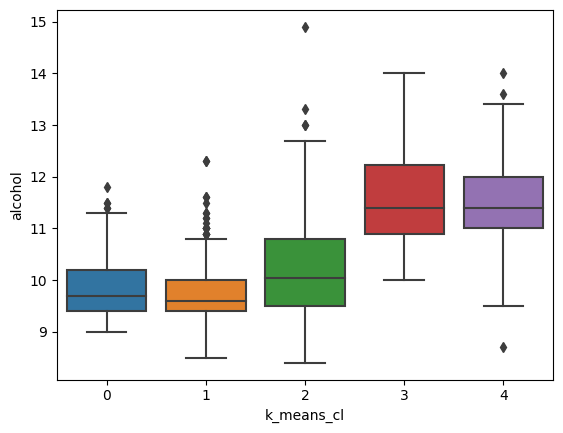

In [ ]:
sns.boxplot(x = "k_means_cl", y = "alcohol", data = wine)
plt.show()

The graph shows that datasets with a higher percentage of alcohol are labeled in clusters 3 and 4. Although cluster 2 exhibits a slight decrease in alcohol content, this aligns with the quality, considering that the clusters are ordered in ascending order of quality.

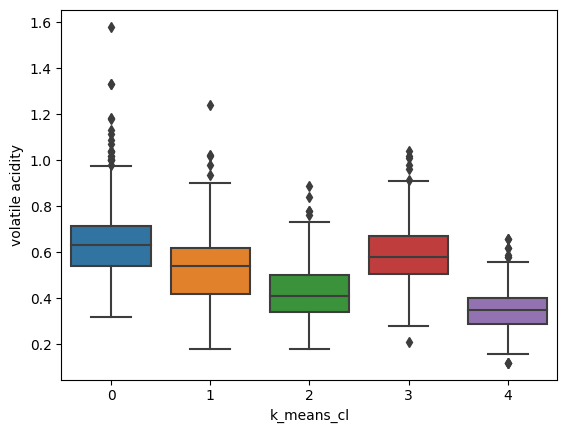

In [ ]:
sns.boxplot(x = "k_means_cl", y = "volatile acidity", data = wine)
plt.show()

The graph shows that volatile acidity has a weak negative correlation with quality. Despite cluster 3 being higher and not precisely following the trend, it suggests that with lower volatile acidity, the quality tends to be higher.

#PCA

In [ ]:
plt.figure(figsize=(6,4))
pca = PCA(n_components=10)
pca_fit = pca.fit(wine_sc)
pc_values = np.arange(pca_fit.n_components_) + 1
plt.bar(pc_values, pca.explained_variance_ratio_)
plt.title('Principal Component Analysis Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

go with 4 components

In [ ]:
pca = PCA(n_components = 4)
principalComponents = pca.fit(wine_sc)
principalComponents.components_
PCweights = pd.DataFrame(data = principalComponents.components_, columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"
])
PCweights

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.498377,-0.245521,0.665602,0.066288,0.060950,-0.071121,-0.022875,0.288547,-0.316892,0.138499,0.011995,0.177811
1,-0.128708,-0.213490,0.074862,-0.055737,-0.089614,-0.115484,-0.177564,-0.392184,0.127121,0.062697,0.641699,0.539048
2,-0.144625,-0.132855,0.137800,0.148591,0.011119,0.779884,0.529779,-0.075539,0.018587,0.104731,0.071138,0.096308
3,0.186508,0.202609,-0.437210,0.201975,-0.054257,0.104181,-0.055019,0.408726,0.019458,0.086981,-0.170044,0.686642


In [ ]:
principalComponentScores = pca.fit_transform(wine_sc)
pc_scores = pd.DataFrame(data = principalComponentScores, columns = ['PC1', 'PC2','PC3','PC4'])
pc_scores

In [ ]:
wine = wine.reset_index()

In [ ]:
wine = pd.concat([wine,pc_scores], axis=1)

#PCA and Cluster

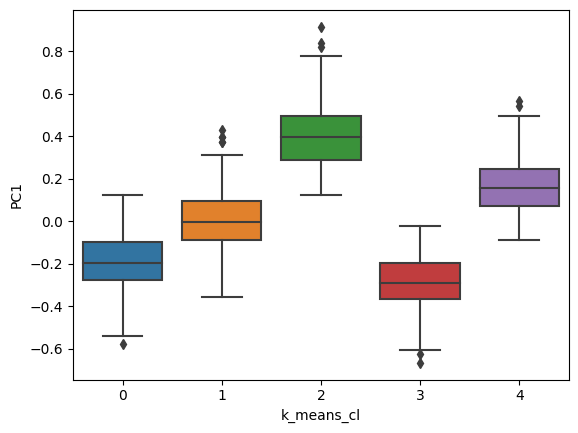

In [ ]:
sns.boxplot(x = "k_means_cl", y = "PC1", data = wine)
plt.show()

let's check citric acid

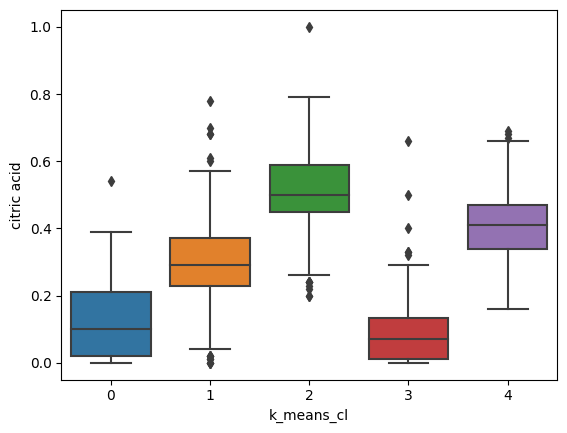

In [ ]:
sns.boxplot(x = "k_means_cl", y = "citric acid", data = wine)
plt.show()

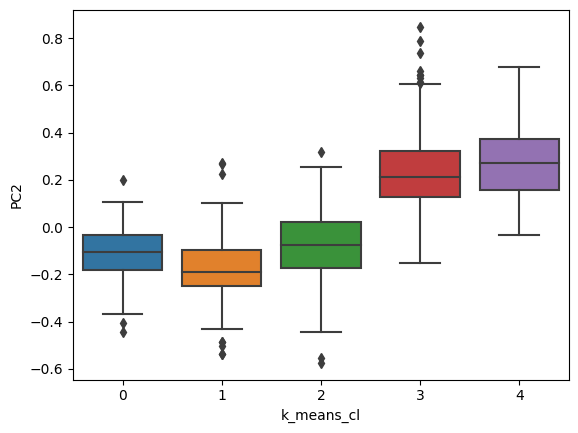

In [ ]:
sns.boxplot(x = "k_means_cl", y = "PC2", data = wine)
plt.show()

let's check alcohol.

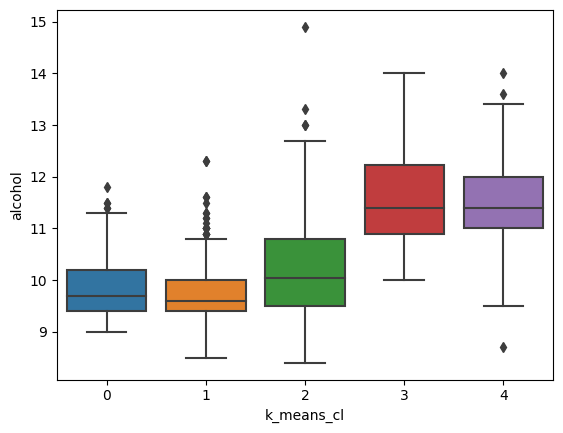

In [ ]:
sns.boxplot(x = "k_means_cl", y = "alcohol", data = wine)
plt.show()

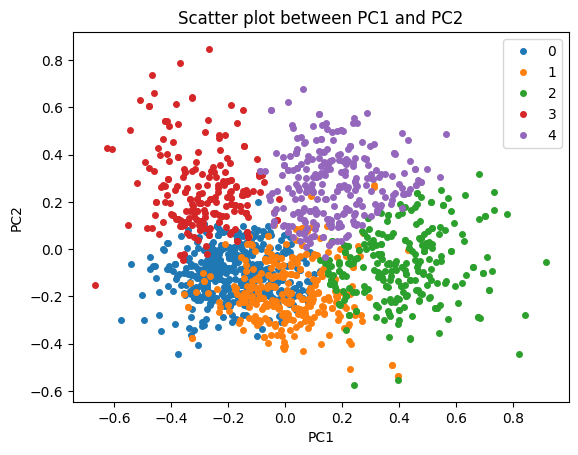

In [ ]:
groups = wine.groupby("k_means_cl")
for name, group in groups:
    plt.plot(group.PC1, group.PC2, marker='o', linestyle='', markersize=4, label=name)
plt.title("Scatter plot between PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()